In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df_sentimen = pd.read_csv('Text_Preprocessing.csv')
df_sentimen.head()

,Unnamed: 0,no,judul,judul_tokens,judul_tokens_fdist,judul_tokens_WSW,judul_tokens_stemmed
0,0,3,usaha kerajinan gerabah untuk meningkatakan pe...,"['usaha', 'kerajinan', 'gerabah', 'untuk', 'me...",<FreqDist with 19 samples and 19 outcomes>,"['usaha', 'kerajinan', 'gerabah', 'meningkatak...","['usaha', 'rajin', 'gerabah', 'meningkatakan',..."
1,1,3,peranan industri gerabah keramik sebagai suatu...,"['peranan', 'industri', 'gerabah', 'keramik', ...",<FreqDist with 18 samples and 18 outcomes>,"['peranan', 'industri', 'gerabah', 'keramik', ...","['peran', 'industri', 'gerabah', 'keramik', 's..."
2,2,3,industri kerajinan gerabah dan peranannya seba...,"['industri', 'kerajinan', 'gerabah', 'dan', 'p...",<FreqDist with 17 samples and 17 outcomes>,"['industri', 'kerajinan', 'gerabah', 'peranann...","['industri', 'rajin', 'gerabah', 'peran', 'sum..."
3,3,3,peranan industri kecil warangka keris dalam me...,"['peranan', 'industri', 'kecil', 'warangka', '...",<FreqDist with 9 samples and 9 outcomes>,"['peranan', 'industri', 'warangka', 'keris', '...","['peran', 'industri', 'warangka', 'keris', 'ti..."
4,4,3,bimbingan agama islam terhadap remaja dalam ke...,"['bimbingan', 'agama', 'islam', 'terhadap', 'r...",<FreqDist with 14 samples and 14 outcomes>,"['bimbingan', 'agama', 'islam', 'remaja', 'kel...","['bimbing', 'agama', 'islam', 'remaja', 'kelua..."


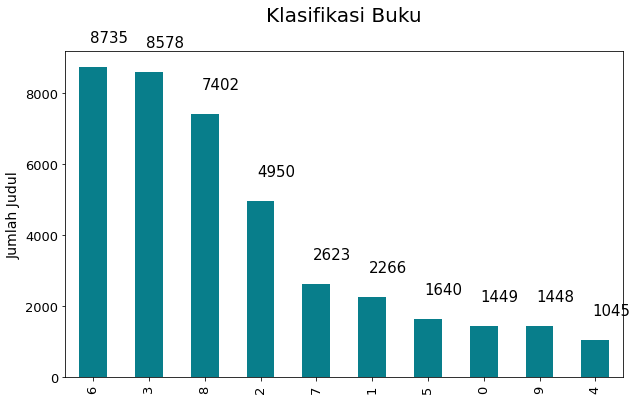

In [6]:
ax = df_sentimen['no'].value_counts().plot(kind='bar', figsize=(10, 6), fontsize=13, color='#087E8B')
ax.set_title('Klasifikasi Buku', size=20, pad=30)
ax.set_ylabel('Jumlah Judul', fontsize=14)

for i in ax.patches:
    ax.text(i.get_x() + 0.19, i.get_height() + 700, str(round(i.get_height(), 2)), fontsize=15)

In [7]:
x = df_sentimen['judul_tokens_stemmed']
y = df_sentimen['no']
print('\nJumlah Judul Buku : ')
print(x)
print('\nJumlah klasifikasi Buku : ')
print (y.value_counts())


Jumlah Judul Buku : 
0        ['usaha', 'rajin', 'gerabah', 'meningkatakan',...
1        ['peran', 'industri', 'gerabah', 'keramik', 's...
2        ['industri', 'rajin', 'gerabah', 'peran', 'sum...
3        ['peran', 'industri', 'warangka', 'keris', 'ti...
4        ['bimbing', 'agama', 'islam', 'remaja', 'kelua...
                               ...                        
40131                       ['angel', 'in', 'the', 'rain']
40132                           ['the', 'hunger', 'games']
40133                        ['marrying', 'mr', 'perfect']
40134              ['bad', 'boy', 'for', 'little', 'girl']
40135    ['tinjau', 'yuridis', 'laksana', 'program', 'j...
Name: judul_tokens_stemmed, Length: 40136, dtype: object

Jumlah klasifikasi Buku : 
6    8735
3    8578
8    7402
2    4950
7    2623
1    2266
5    1640
0    1449
9    1448
4    1045
Name: no, dtype: int64


In [8]:
x.head

<bound method NDFrame.head of 0        ['usaha', 'rajin', 'gerabah', 'meningkatakan',...
1        ['peran', 'industri', 'gerabah', 'keramik', 's...
2        ['industri', 'rajin', 'gerabah', 'peran', 'sum...
3        ['peran', 'industri', 'warangka', 'keris', 'ti...
4        ['bimbing', 'agama', 'islam', 'remaja', 'kelua...
                               ...                        
40131                       ['angel', 'in', 'the', 'rain']
40132                           ['the', 'hunger', 'games']
40133                        ['marrying', 'mr', 'perfect']
40134              ['bad', 'boy', 'for', 'little', 'girl']
40135    ['tinjau', 'yuridis', 'laksana', 'program', 'j...
Name: judul_tokens_stemmed, Length: 40136, dtype: object>

In [9]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
# x.apply(enc.fit_transform)
# x.head

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y , random_state = 42)

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [12]:
#tfidf
vectorizer = TfidfVectorizer() 
x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test)

In [24]:
from sklearn.neighbors import KNeighborsClassifier
# model = KNeighborsClassifier()
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(
    x_train, # data training 80%
    y_train
)

y_pred = model.predict(
    x_test # data uji 20%
)
print(y_pred)

[6 6 3 ... 8 3 8]



================= confusion matrix ===================== 


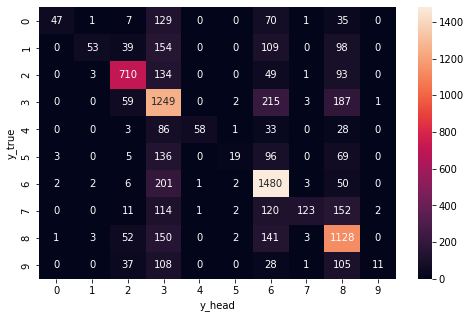


accuracy score hasil prediksi adalah: 
60.76233183856502
precision score hasil prediksi adalah: 
60.76233183856502
recall score hasil prediksi adalah: 
60.76233183856502

accuracy knn adalah:  0.6076233183856502
              precision    recall  f1-score   support

           0       0.89      0.16      0.27       290
           1       0.85      0.12      0.21       453
           2       0.76      0.72      0.74       990
           3       0.51      0.73      0.60      1716
           4       0.97      0.28      0.43       209
           5       0.68      0.06      0.11       328
           6       0.63      0.85      0.72      1747
           7       0.91      0.23      0.37       525
           8       0.58      0.76      0.66      1480
           9       0.79      0.04      0.07       290

    accuracy                           0.61      8028
   macro avg       0.76      0.39      0.42      8028
weighted avg       0.67      0.61      0.56      8028




In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
# cm = confusion_matrix(y_test, y_pred)
print("\n================= confusion matrix ===================== ")
# print(cm)
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.show()
print("\n=========================================== ")
# accuracy score
print("accuracy score hasil prediksi adalah: ")
print(accuracy_score(y_test, y_pred) * 100)

# precision score
print("precision score hasil prediksi adalah: ")
print(precision_score(y_test, y_pred, average='micro') * 100)

# recall score
print("recall score hasil prediksi adalah: ")
print(recall_score(y_test, y_pred, average='micro') * 100)

print("\n============================================================================= ")
print("accuracy knn adalah: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("\n============================================================================= ")

In [26]:
pd.crosstab(y_test, y_pred)

col_0,0,1,2,3,4,5,6,7,8,9
no,,,,,,,,,,
0,47,1,7,129,0,0,70,1,35,0
1,0,53,39,154,0,0,109,0,98,0
2,0,3,710,134,0,0,49,1,93,0
3,0,0,59,1249,0,2,215,3,187,1
4,0,0,3,86,58,1,33,0,28,0
5,3,0,5,136,0,19,96,0,69,0
6,2,2,6,201,1,2,1480,3,50,0
7,0,0,11,114,1,2,120,123,152,2
8,1,3,52,150,0,2,141,3,1128,0


In [27]:
# pip install imblearn

In [28]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [29]:
x_train_smote, y_train_smote = smote.fit_resample(
    x_train.astype('float'), # data training 80%
    y_train
)

In [30]:
from collections import Counter
print("Before SMOTE :", Counter(y_train))
print("After  SMOTE :", Counter(y_train_smote))

Before SMOTE : Counter({6: 6988, 3: 6862, 8: 5922, 2: 3960, 7: 2098, 1: 1813, 5: 1312, 0: 1159, 9: 1158, 4: 836})
After  SMOTE : Counter({6: 6988, 7: 6988, 8: 6988, 9: 6988, 3: 6988, 2: 6988, 1: 6988, 5: 6988, 0: 6988, 4: 6988})


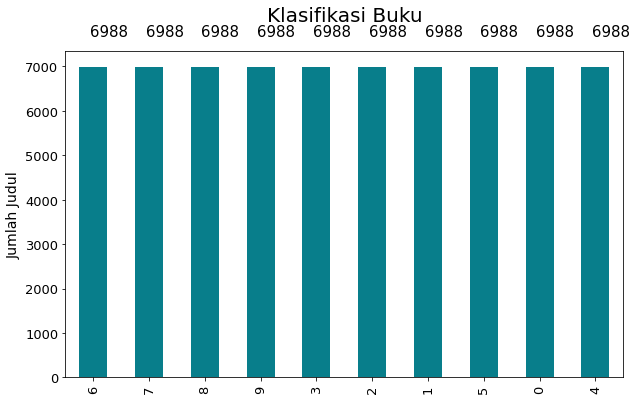

In [31]:
ax = y_train_smote.value_counts().plot(kind='bar', figsize=(10, 6), fontsize=13, color='#087E8B')
ax.set_title('Klasifikasi Buku', size=20, pad=30)
ax.set_ylabel('Jumlah Judul', fontsize=14)

for i in ax.patches:
    ax.text(i.get_x() + 0.19, i.get_height() + 700, str(round(i.get_height(), 2)), fontsize=15)

In [32]:

model.fit(
    x_train_smote, # data training 80%
    y_train_smote
)

y_pred_smote = model.predict(
    x_test # data uji 20%
)
print(y_pred_smote)

[5 6 9 ... 9 3 8]



================= confusion matrix ===================== 


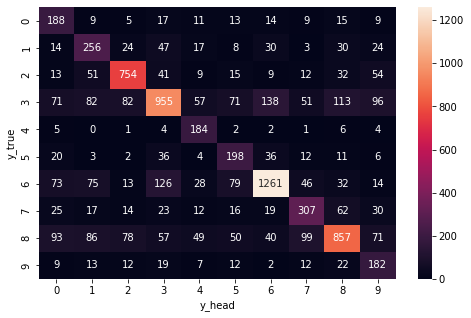


accuracy score hasil prediksi adalah: 
64.050822122571
precision score hasil prediksi adalah: 
64.050822122571
recall score hasil prediksi adalah: 
64.050822122571

accuracy nb adalah:  0.64050822122571
              precision    recall  f1-score   support

           0       0.37      0.65      0.47       290
           1       0.43      0.57      0.49       453
           2       0.77      0.76      0.76       990
           3       0.72      0.56      0.63      1716
           4       0.49      0.88      0.63       209
           5       0.43      0.60      0.50       328
           6       0.81      0.72      0.76      1747
           7       0.56      0.58      0.57       525
           8       0.73      0.58      0.64      1480
           9       0.37      0.63      0.47       290

    accuracy                           0.64      8028
   macro avg       0.57      0.65      0.59      8028
weighted avg       0.68      0.64      0.65      8028




In [35]:
# cm = confusion_matrix(y_test, y_pred)
print("\n================= confusion matrix ===================== ")
# print(cm)
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred_smote), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.show()
print("\n=========================================== ")
# accuracy score
print("accuracy score hasil prediksi adalah: ")
print(accuracy_score(y_test, y_pred_smote) * 100)

# precision score
print("precision score hasil prediksi adalah: ")
print(precision_score(y_test, y_pred_smote, average='micro') * 100)

# recall score
print("recall score hasil prediksi adalah: ")
print(recall_score(y_test, y_pred_smote, average='micro') * 100)

print("\n============================================================================= ")
print("accuracy nb adalah: ", accuracy_score(y_test, y_pred_smote))
print(classification_report(y_test, y_pred_smote))
print("\n============================================================================= ")